
## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 7: Graphs and Networks, Probabilty and Markov Processes
## Due December 12, 2021 by 11:59 PM
### <span style="color: red">Xiangyu Gao</span>

Copyright &copy; 2021, University of Washington

<hr>

**Instructions**: Please use this notebook as a template. Answer all questions using well formatted Markdown with embedded LaTeX equations, executable Jupyter cells, or both. Submit your homework solutions as an `.ipynb` file via Canvas.

<span style="color: red'">
Although you may discuss the homework with others, you must turn in your own, original work.
</span>

**Things to remember:**
- Use complete sentences. Equations should appear in text as grammatical elements.
- Comment your code.
- Label your axes. Title your plots. Use legends where appropriate. 
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order. 

### 0. Warmup (Do not turn in)

- Make sure you download, read, and run the notebook for lectures 8 and 9. Work through the notebook cell by cell and see what happens when you change the expressions, and make up some of your own.
- The material covered in class is intended to be an introductory overview of the incredibly rich and expansive subject of Graph Theory.
- Most of the section on basic graph theory is from chapter one of

> Bollobas, [Modern Graph Theory](https://www.springer.com/gp/book/9780387984889).

- The spanning tree algorithm by Prim is from 

> Gibbons, [Algorithmic Graph Theory](https://www.amazon.com/Algorithmic-Graph-Theory-Alan-Gibbons/dp/0521288819). 

- Graphs as matrices is covered in 

> Nica, [A Brief Introduction to Spectral Graph Theory](https://www.amazon.com/Introduction-Spectral-Theory-Textbooks-Mathematics/dp/3037191880/ref=sr_1_2?crid=3ETRQ8B0PW4EJ&keywords=spectral+graph+theory&qid=1573687537&s=books&sprefix=spectral+graph%2Cstripbooks%2C195&sr=1-2).

The consensus algorithm is described in [these notes](http://www.eeci-institute.eu/pdf/M010/Eeci-sp09_L4_graphtheory.pdf) by Richard Murray.

You will also need `networkx` which can be obtained [here](https://networkx.github.io/). If you are on Google CoLab, see [here](https://stackoverflow.com/questions/51342408/how-do-i-install-python-packages-in-googles-colab) for how to install packages. 

- Most of the section on probability is from chapter of the really, really, really good book:

> Feller, [An Introduction to Probability Theory and Its Applications, Vol 1](https://www.amazon.com/Introduction-Probability-Theory-Applications-Vol/dp/0471257087), 3rd Edition, Wiley, 1968. 

- The material on Markov Chains can be found in numerous textbooks. A good online source is Chapter 11 of 

> Grinstead, [Introduction to Probability](http://www.dartmouth.edu/~chance/teaching_aids/books_articles/probability_book/book.html).

## 1. Creating a Graph

Let $V = \{ 1, ..., 20 \}$ and say that $uv \in E$ if and only if $u$ and $v$ have a common factor other than $1$. Use `networkx` to define this graph and render it. Make sure to label the nodes.

[(2, 2), (2, 4), (2, 6), (2, 8), (2, 10), (2, 12), (2, 14), (2, 16), (2, 18), (2, 20), (3, 3), (3, 6), (3, 9), (3, 12), (3, 15), (3, 18), (4, 4), (4, 6), (4, 8), (4, 10), (4, 12), (4, 14), (4, 16), (4, 18), (4, 20), (5, 5), (5, 10), (5, 15), (5, 20), (6, 6), (6, 8), (6, 9), (6, 10), (6, 12), (6, 14), (6, 15), (6, 16), (6, 18), (6, 20), (7, 7), (7, 14), (8, 8), (8, 10), (8, 12), (8, 14), (8, 16), (8, 18), (8, 20), (9, 9), (9, 12), (9, 15), (9, 18), (10, 10), (10, 12), (10, 14), (10, 15), (10, 16), (10, 18), (10, 20), (11, 11), (12, 12), (12, 14), (12, 15), (12, 16), (12, 18), (12, 20), (13, 13), (14, 14), (14, 16), (14, 18), (14, 20), (15, 15), (15, 18), (15, 20), (16, 16), (16, 18), (16, 20), (17, 17), (18, 18), (18, 20), (19, 19), (20, 20)]


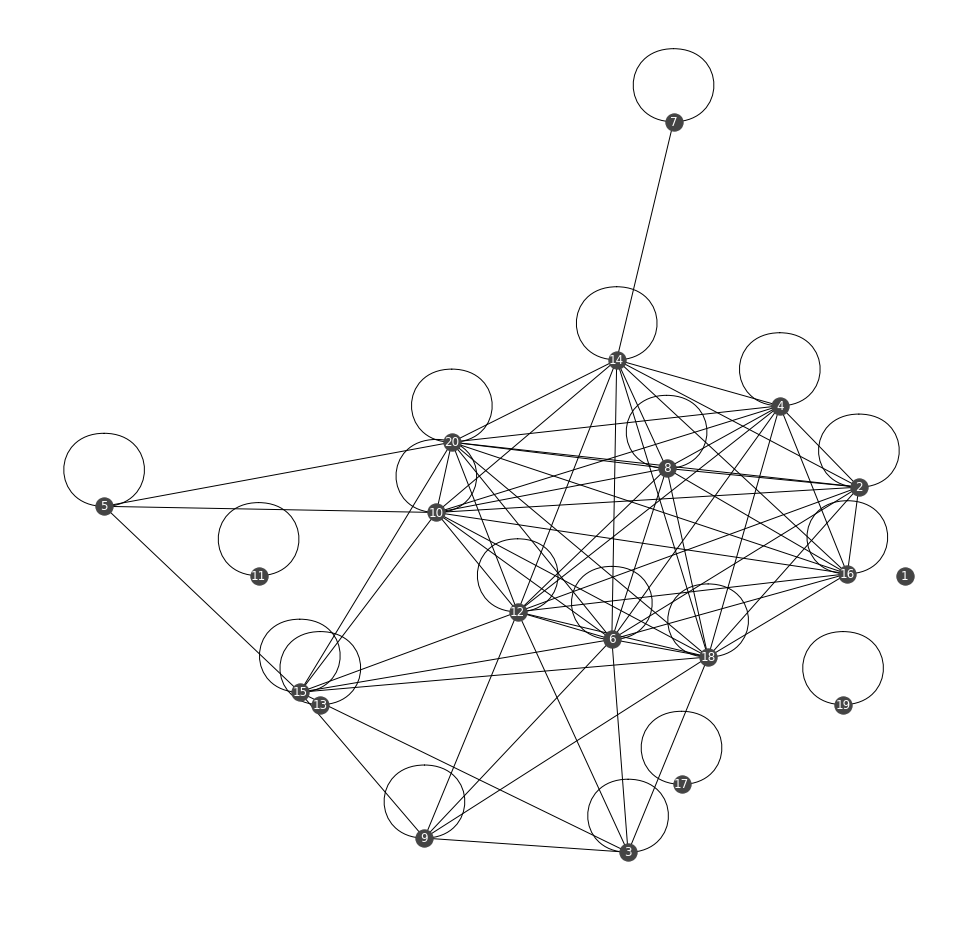

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def hcf(x, y):
   if x > y:
       smaller = y
   else:
       smaller = x
   for i in range(1,smaller + 1):
       if((x % i == 0) and (y % i == 0)):
           hcf = i
   return x,y,hcf

V = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
result_pair = []
result_factor = []

for x in V:
  for y in V:
    a,b,c = hcf(x,y)
    if c > 1 and a <= b:
      result_pair.append((a,b))
      result_factor.append((c))
print(result_pair)

G = nx.Graph()
G.add_nodes_from(V)
G.add_edges_from(result_pair)

basic_graph,ax = plt.subplots(1,1,figsize=(17,17))
nx.draw(G,
        ax=ax, 
        pos=nx.kamada_kawai_layout(G),
        with_labels=True, 
        node_color='#444444',
        font_color="white")


## 2. Bipartite Graphs

a) What is the greatest number of edges a connected bipartite graph with $5$ nodes can have? Draw all five node graphs with this number of edges (up to isomorphism).

b) What is the least number of edges a connected bipartite graph with $5$ nodes can have? Draw all five node graphs with this number of edges (up to isomorphism).

a)

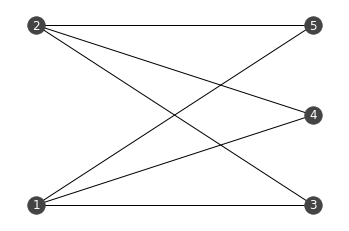

In [ ]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1,3),(1,4),(1,5),(2,3),(2,4),(2,5)])

bipartite_graph,ax = plt.subplots(1,1)
nx.draw(G, ax=ax, pos=nx.bipartite_layout(G,[1,2]),with_labels=True, node_color='#444444',font_color="white")

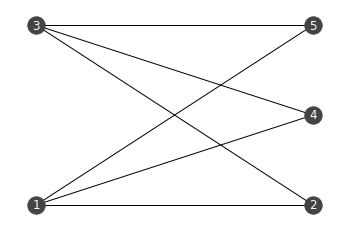

In [ ]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1,2),(1,4),(1,5),(2,3),(3,4),(3,5)])

bipartite_graph,ax = plt.subplots(1,1)
nx.draw(G, ax=ax, pos=nx.bipartite_layout(G,[1,3]),with_labels=True, node_color='#444444',font_color="white")

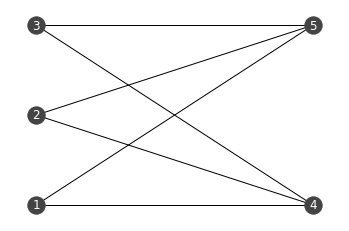

In [ ]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1,4),(1,5),(2,4),(2,5),(3,4),(3,5)])

bipartite_graph,ax = plt.subplots(1,1)
nx.draw(G, ax=ax, pos=nx.bipartite_layout(G,[1,2,3]),with_labels=True, node_color='#444444',font_color="white")

 the greatest number of edges a connected bipartite graph with  5  nodes is **6**

b)

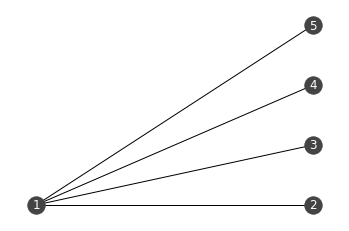

In [ ]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1,2),(1,3),(1,4),(1,5)])

bipartite_graph,ax = plt.subplots(1,1)
nx.draw(G, ax=ax, pos=nx.bipartite_layout(G,[1]),with_labels=True, node_color='#444444',font_color="white")

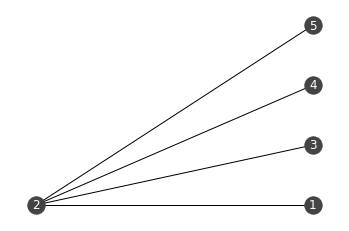

In [ ]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(2,1),(2,3),(2,4),(2,5)])

bipartite_graph,ax = plt.subplots(1,1)
nx.draw(G, ax=ax, pos=nx.bipartite_layout(G,[2]),with_labels=True, node_color='#444444',font_color="white")

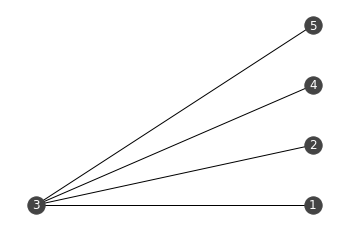

In [ ]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(3,1),(3,2),(3,4),(3,5)])

bipartite_graph,ax = plt.subplots(1,1)
nx.draw(G, ax=ax, pos=nx.bipartite_layout(G,[3]),with_labels=True, node_color='#444444',font_color="white")

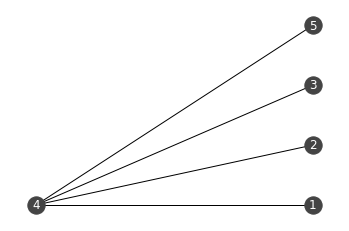

In [ ]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(4,2),(4,3),(1,4),(4,5)])

bipartite_graph,ax = plt.subplots(1,1)
nx.draw(G, ax=ax, pos=nx.bipartite_layout(G,[4]),with_labels=True, node_color='#444444',font_color="white")

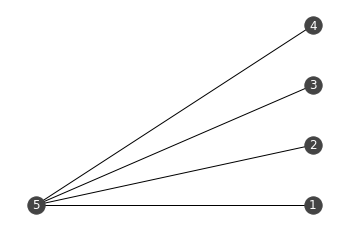

In [ ]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(5,2),(5,3),(5,4),(1,5)])

bipartite_graph,ax = plt.subplots(1,1)
nx.draw(G, ax=ax, pos=nx.bipartite_layout(G,[5]),with_labels=True, node_color='#444444',font_color="white")

 the least number of edges a connected bipartite graph with  5  nodes is **4**

## 3. The Laplacian

Consider the random graphs returned by `nx.fast_gnp_random_graph(n,p)` where $n$ is the number of nodes and $p$ is the probability of an edge between any two nodes. 

Make a list of graphs with $10$ nodes with $p$ ranging from 0 to 1 by steps of 0.01. For each graph, compute the eigenvalues of the Laplacian. Then plot all the eigenvalues for against $p$. For example, above $p=0.01$ you would have a point for each of the 10 real eigenvalues of the graph you made with $p=0.01$. 

What trends do you see in the eigenvalues?

Based on experimentation, what are the eigenvalues of the Laplacian of a completely connected graph?

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0 -1]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 -1  0  0  0  0  0  1]]
[[ 1  0  0 -1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [-1  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]]
[[ 1  0

<Figure size 432x288 with 0 Axes>

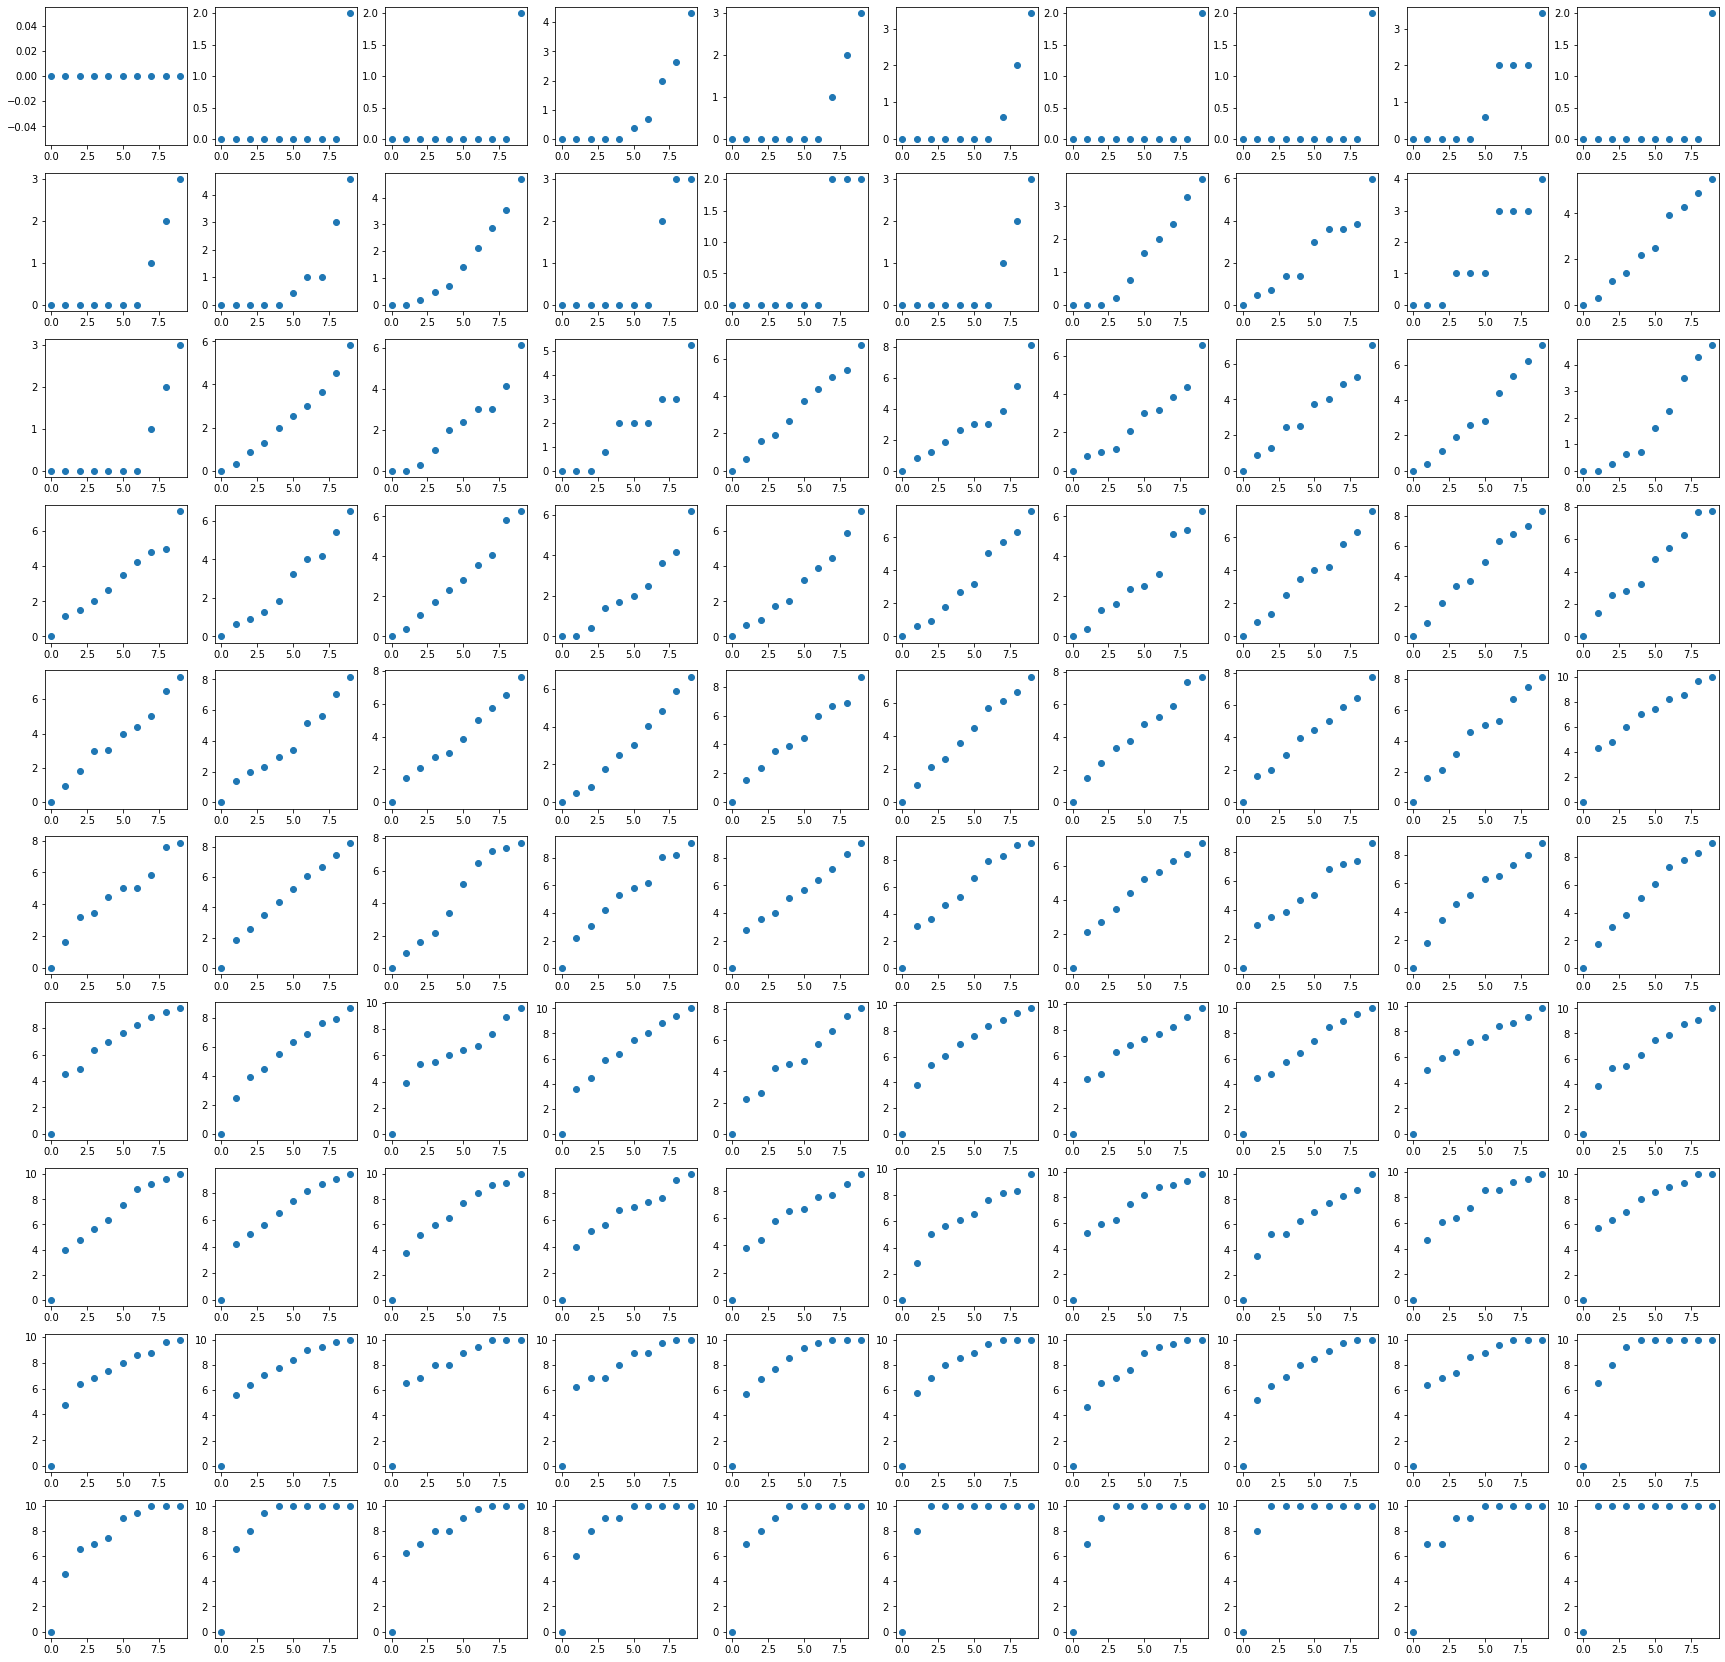

In [83]:
import numpy as np

plt.subplots_adjust(hspace=20,wspace=20)
plt.subplots(figsize = (30,30))
for p in range(100):
  G = nx.fast_gnp_random_graph(10,(p+1)/100)
#  print("%d component(s)" % nx.number_connected_components(G))
  L = nx.laplacian_matrix(G).todense()
  print(L)
  eigs = np.linalg.eigvals(L)
#  plt.subplots_adjust(hspace=1, wspace=1)
  plt.subplot(10, 10, (p+1))
  plt.plot(np.sort(eigs),'o')
#  plt.title("Eigenvalues of Laplacian of Random Matrix")

## 4. Dice

Suppose two dice are tossed, but that the dice are weighted so that 1 comes up as twice as likely as any other number for both dice. 

a) What is the probability of getting a sum of seven?

b) What is the probability of getting a sum of seven given that the first die comes up 1?

c) What is the probability neither die coming up 1?

d) What is the PDF of the random variable $X$ defined to the the sum of the two dice?

In [84]:
d1 = 2/7
d2 = 1/7
d3 = 1/7
d4 = 1/7
d5 = 1/7
d6 = 1/7
d = [0,2/7,1/7,1/7,1/7,1/7,1/7]

In [113]:
def fun_p(x):
  p = 0
  for i in range(x):
        if i > 0:
          a = x - i
          if i < 7 and a < 7:
            pp = d[a]*d[i]
            p = p + pp


  return p

a)
probability is 0.16327



In [101]:
#  method 1
#(1,6)
p1 = d1*d6
#(2,5)
p2 = d2*d5
#(3,4)
p3 = d3*d4
#(4,3)
p4 = d4*d3
#(5,2)
p5 = d5*d2
#(6,1)
p6 = d6*d1

p = p1+p2+p3+p4+p5+p6
print(p)

#  method 2
print(fun_p(7))

0.16326530612244897
0.16326530612244897


b)
If the first die is 1, so the other die must be 6

since the probability is $\frac{1}{7} \approx 0.14286$

c)probability is $\frac{25}{49} \approx 0.5102$

In [132]:
p = 1-(d1*d1+2*d1*(1-d1))
p

0.5102040816326531

d)

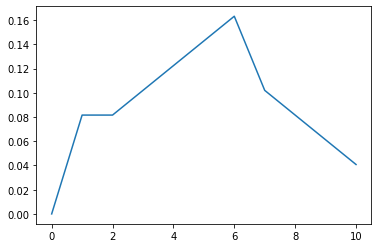

In [131]:
L = []
for i in range(12):
  if i > 0:
    a = fun_p(i)
    L.append(a)
plt.plot(L)

## 5. Functions of a Random Variable

Suppose $X$ is distributed uniformly in the interval $[0,1]$. That is, $f_X(x) = 1$ if $x \in [0,1]$ and $f_X(x) = 0$ otherwise. 

a) What is the CDF of $X$?

b) Let $Y = X^2$. Find and plot $F_Y$ and $f_Y$. 

a)
$CDF = 
\begin{Bmatrix} y = 0 , x \in (-\infty,0) \\ 
y = x , x \in [0,1]\\ 
y = 1 , x \in (1,+\infty)\end{Bmatrix}$

Text(-0.4, 0.5, 'cdf')

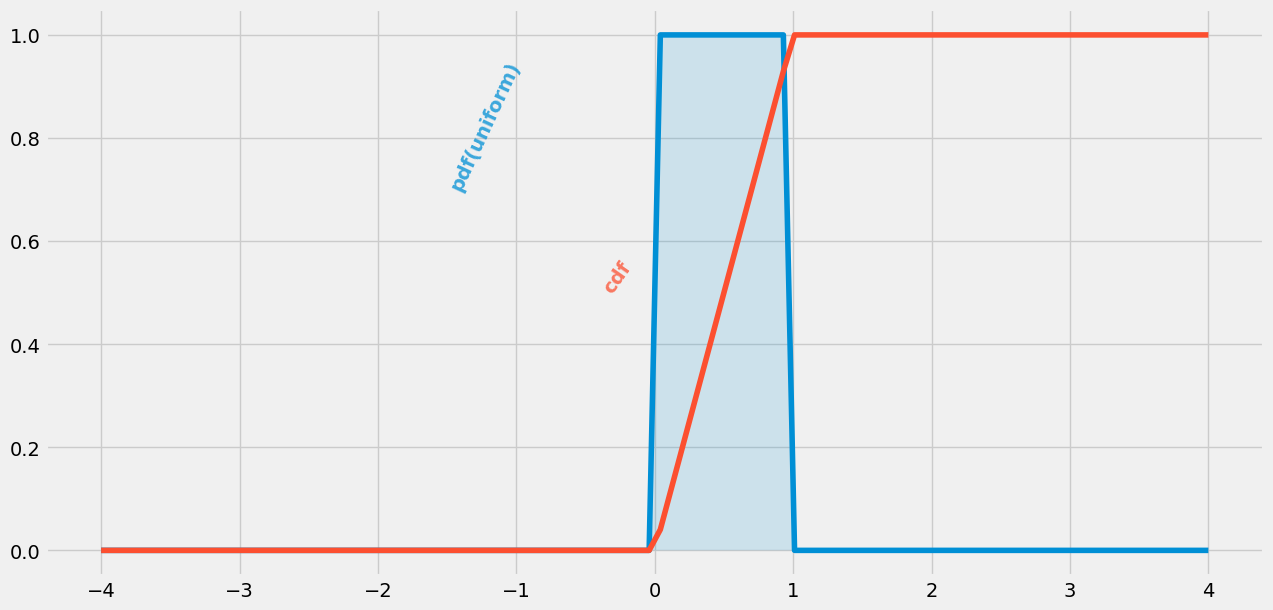

In [9]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.style as style
from IPython.core.display import HTML

#PLOTTING CONFIG 
%matplotlib inline
style.use('fivethirtyeight')
plt.rcParams['figure.figsize']=(14,7)
plt.figure(dpi=100)

#PDF 
plt.plot(np.linspace(-4,4,100),stats.uniform.pdf(np.linspace(-4,4,100)))
plt.fill_between(np.linspace(-4,4,100),stats.uniform.pdf(np.linspace(-4,4,100)),alpha=0.15)

#CDF
plt.plot(np.linspace(-4,4,100),stats.uniform.cdf(np.linspace(-4,4,100)))

#LEGEND 
plt.text(x=-1.5,y=0.7,s="pdf(uniform)",rotation=65,alpha=0.75,weight="bold",color="#008fd5")
plt.text(x=-0.4,y=0.5,s="cdf",rotation=55,alpha=0.75,weight="bold",color="#fc4f30")

b)
$F_Y(x) = P[Y \le x] = p[X^2 \le x] \\
= P[-\sqrt{x} \le X \le \sqrt{x}] \\
= P[X \le \sqrt{x}] \\
= F_X(\sqrt{x}) \\
= \sqrt{x},(x \in [0,1] ) \\
f_Y(x) = \frac{d}{dx}\sqrt{x} \\
= \frac{1}{2\sqrt{x}},(x \in [0,1] )$

$\therefore F_Y(x)=
\begin{Bmatrix}  0 , x \in (-\infty,0) \\ 
\sqrt{x} , x \in [0,1]\\ 
1 , x \in (1,+\infty)\end{Bmatrix}$

$f_Y(x) = 
\begin{Bmatrix} y = 0 , x \in (-\infty,0) \cup (0,\infty)\\ 
\frac{1}{2\sqrt{x}} , x \in [0,1]\\ 
\end{Bmatrix}$

Text(-0.4, 0.5, 'cdf')

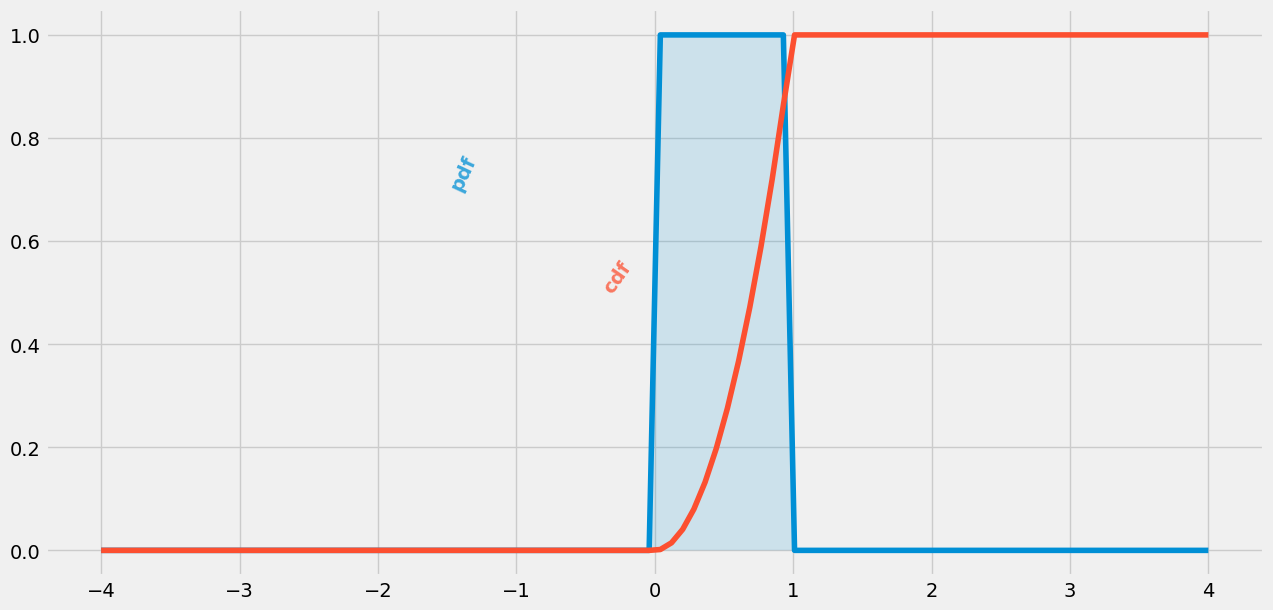

In [10]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.style as style
from IPython.core.display import HTML

#PLOTTING CONFIG 
%matplotlib inline
style.use('fivethirtyeight')
plt.rcParams['figure.figsize']=(14,7)
plt.figure(dpi=100)

#PDF 
x = np.linspace(-4,4,100)
y_1 = stats.uniform.pdf(x)
y_pdf = y_1 * y_1
plt.plot(x,y_pdf)
plt.fill_between(x,y_pdf,alpha=0.15)

#CDF
y_2 = stats.uniform.cdf(x)
y_cdf = y_2 * y_2
plt.plot(x,y_cdf)

#LEGEND 
plt.text(x=-1.5,y=0.7,s="pdf",rotation=65,alpha=0.75,weight="bold",color="#008fd5")
plt.text(x=-0.4,y=0.5,s="cdf",rotation=55,alpha=0.75,weight="bold",color="#fc4f30")

## 6. Markov Process Properties

Consider the following three Markov Processes.
![HW-MPs.jpg](attachment:HW-MPs.jpg)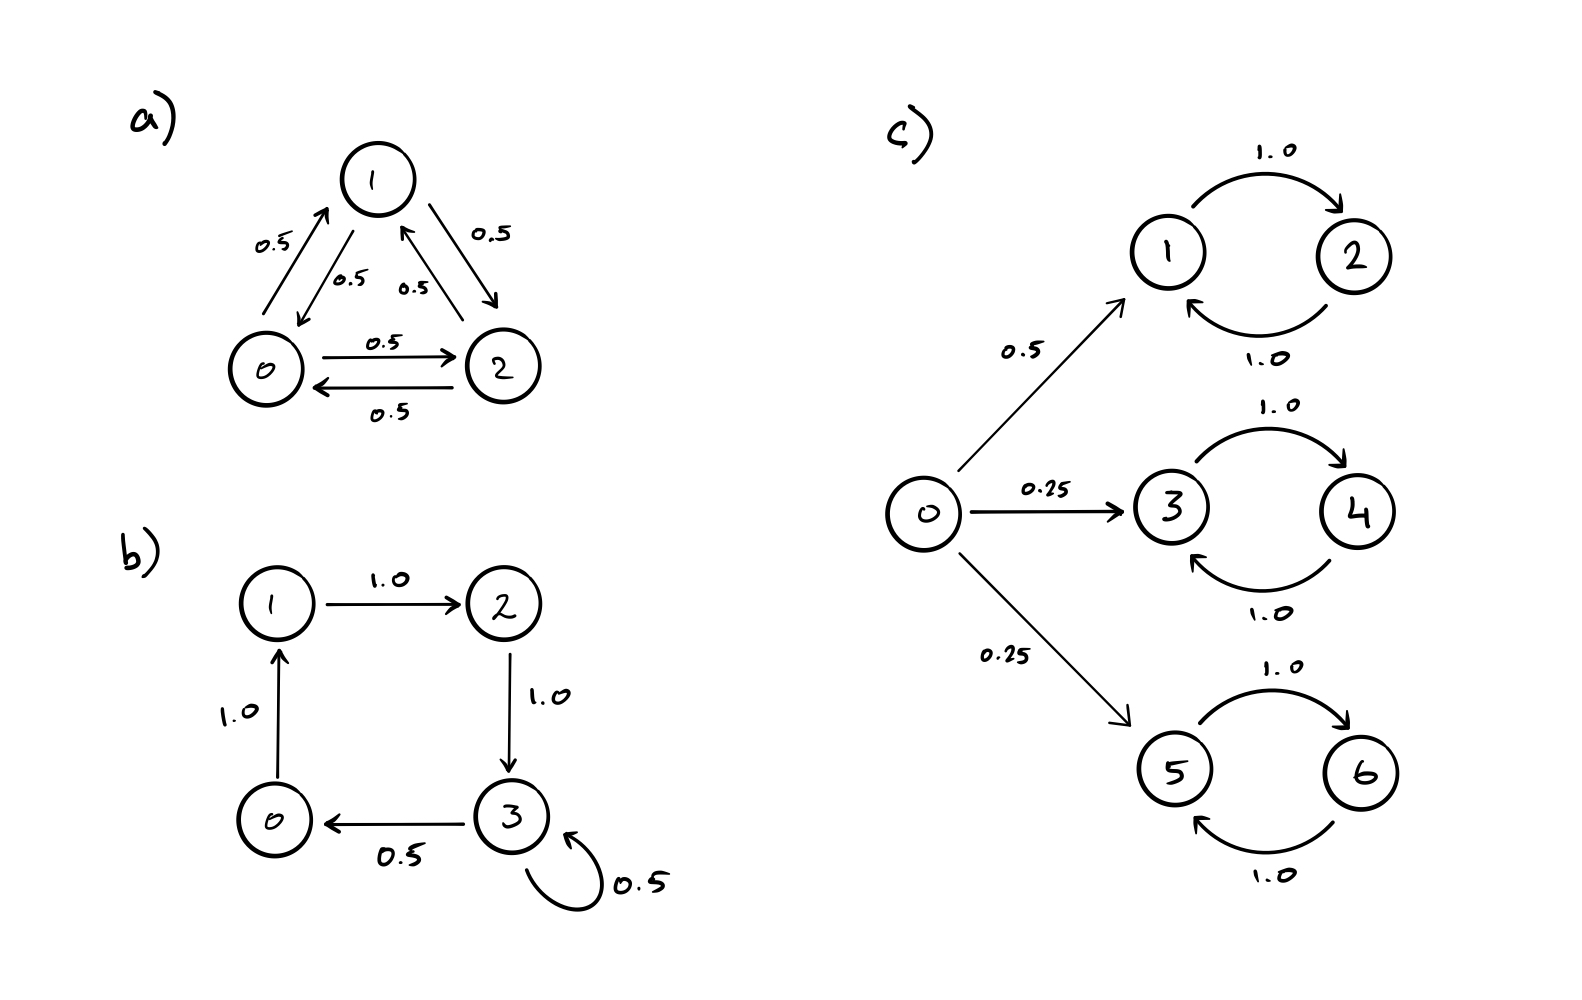

For each process,

i) Find the period of each state.

ii) Identify transient states.

iii) Identify absorbing states and absorbing subsets of states.

iv) Identify ergodic states.

a)
period: all states are **3**

transient states: **None**

absorbing states: **None**

ergodic states: **None**

b)
period: all states are **4**

transient states: **None**

absorbing states: **None**

ergodic states: **3**

c)
period: states **{1,2},{3,4},{5,6}**are **2**

transient states: **0**

absorbing subsets: **{1,2},{3,4},{5,6}**

ergodic states: **None**

## 7. Stationary Distributions

For each Markov Process in Problem 6:

i) Find the update matrix $Q$.

ii) Simulate the dynamics $p_{k+1} = p_k Q$ starting at the distribution in which $p_0(0) = 1$. Make a plot of the dynamics for each system. To do this, plot a 2D grid where grid point $(k,i)$ is a gray-scale square corresponding to the probability that the process is in state $i$ at time $k$ (the Gambler's Ruin example in the notes does this).

a)$Q(0,0) = 0 , Q(0,1)=0.5,Q(0,2)=0.5 \\ 
Q(1,0) = 0.5 , Q(1,1)=0,Q(1,2)=0.5 \\
Q(2,0) = 0.5 , Q(2,1)=0.5,Q(2,2)=0 \\
Q = \begin{pmatrix}
0 & 0.5 & 0.5\\
0.5 & 0 & 0.5\\
0.5 & 0.5& 0
\end{pmatrix} $

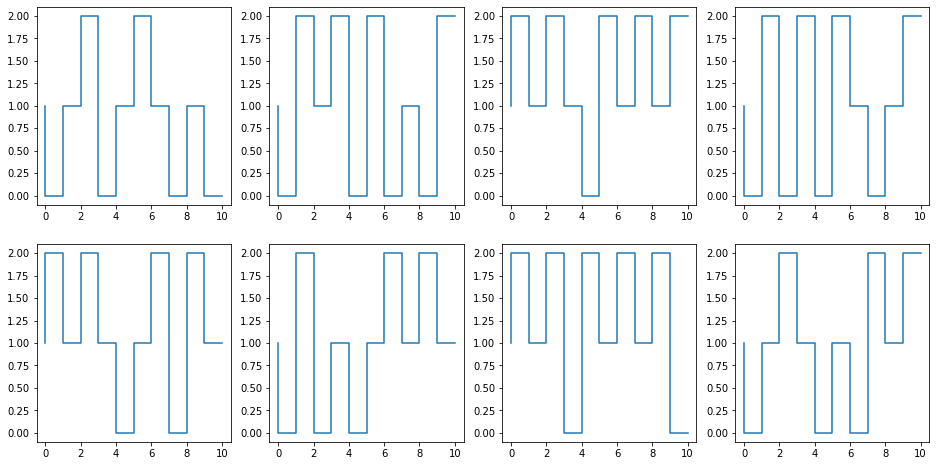

In [38]:
import matplotlib.pyplot as plt
import random
def gamble(p,n,k):
    x = 1
    trajectory = [x]
    for i in range(k):
      if x == 0:
        if random.random() > p:
            x = 1
        else:
            x = 2
        trajectory.append(x)
      elif x == 1:
        if random.random() > p:
            x = 2
        else:
            x = 0
        trajectory.append(x)
      else: #x = 2
        if random.random() > p:
            x = 0
        else:
            x = 1
        trajectory.append(x)
    return trajectory

p = 0.5
n = 10
k = 10
gamble_trajectories,ax = plt.subplots(2,4,figsize=(16,8))

for i in range(8):
    x = gamble(p,n,k)
    t =range(len(x))
    a = ax[int(i/4)][i%4]
    a.step(t,x)
    # if x[-1] == n:
    #     a.set_title("Win :-)")
    # else:
    #     a.set_title("Ruin :-(")

[[0.  0.5 0.5]
 [0.5 0.  0.5]
 [0.5 0.5 0. ]]


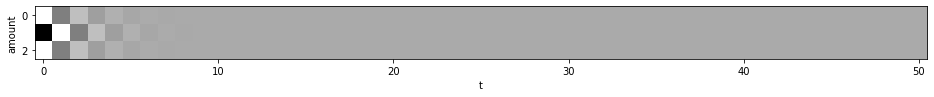

In [119]:
n = 2

P = np.zeros((n+1,n+1))
P[0,0] = 0
P[n,n] = 0
P[2,1] = 0.5
P[0,1] = 0.5
P[1,0] = 0.5
P[0,2] = 0.5
P[1,0] = 0.5
P[1,2] = 0.5
P[2,0] = 0.5
print(P)
p = np.zeros(n+1)
p[1] = 1

trajectory = [p]
for t in range(50):
    p = P.dot(p)
    trajectory.append(p)

trajectory = np.matrix(trajectory).transpose()
    
fig,ax = plt.subplots(1,1,figsize=(16,5))
ax.imshow(trajectory,cmap="gray_r")
ax.set_xlabel("t")
ax.set_ylabel("amount");

b)$Q(0,1)=1 \\ 
Q(1,2) = 1 \\
Q(2,3) = 1 \\
Q(3,3) = 0.5\\
Q(3,0) = 0.5\\
Q = \begin{pmatrix}
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1\\
0.5 & 0 & 0 & 0.5
\end{pmatrix} $

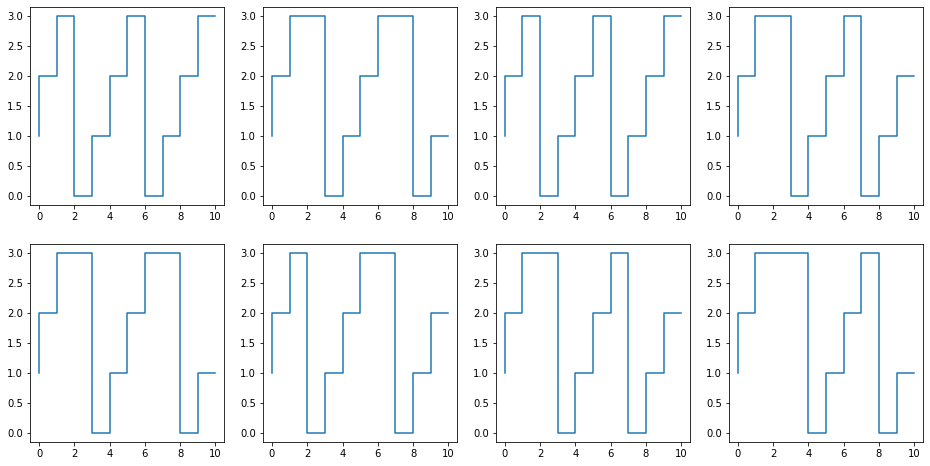

In [65]:
import matplotlib.pyplot as plt
import random
def gamble(p,n,k):
    x = 1
    trajectory = [x]
    for i in range(k):
      if x == 0:
        x = 1
        trajectory.append(x)
      elif x == 1:
        x = 2
        trajectory.append(x)
      elif x == 2:
        x = 3
        trajectory.append(x)
      else: # x == 3
        if random.random() > p:
          x = 3
        else:
          x = 0
        trajectory.append(x)
    return trajectory

p = 0.5
n = 10
k = 10
gamble_trajectories,ax = plt.subplots(2,4,figsize=(16,8))

for i in range(8):
    x = gamble(p,n,k)
    t =range(len(x))
    a = ax[int(i/4)][i%4]
    a.step(t,x)

[[0.  1.  0.  0. ]
 [0.  0.  1.  0. ]
 [0.  0.  0.  1. ]
 [0.5 0.  0.  0.5]]


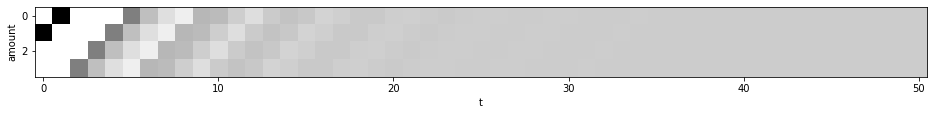

In [122]:
n = 3

P = np.zeros((n+1,n+1))
P[0,1] = 1
P[1,2] = 1
P[2,3] = 1
P[3,0] = 0.5
P[3,3] = 0.5
print(P)
p = np.zeros(n+1)
p[1] = 1

trajectory = [p]
for t in range(50):
    p = P.dot(p)
    trajectory.append(p)

trajectory = np.matrix(trajectory).transpose()
    
fig,ax = plt.subplots(1,1,figsize=(16,5))
ax.imshow(trajectory,cmap="gray_r")
ax.set_xlabel("t")
ax.set_ylabel("amount");

c)$Q(0,1) = 0.5 \\ 
Q(0,3) = 0.25 \\
Q(0,5) = 0.25 \\
Q(1,2) = 1 \\
Q(2,1) = 1 \\
Q(3,4) = 1\\
Q(4,3) = 1\\
Q(5,6) = 1 \\
Q(6,5) = 1 \\
Q = \begin{pmatrix}
0 & 0.5 & 0 & 0.25 & 0 & 0.25 & 0\\
0 & 0 & 1 & 0 & 0 & 0& 0\\
0 & 1 & 0 & 0 & 0 & 0& 0\\
0 & 0 & 0 & 0 & 1 & 0& 0\\
0 & 0 & 0 & 1 & 0 & 0& 0\\
0 & 0 & 0 & 0 & 0 & 0& 1\\
0 & 0 & 0 & 0 & 0 & 1& 0\\
\end{pmatrix} $

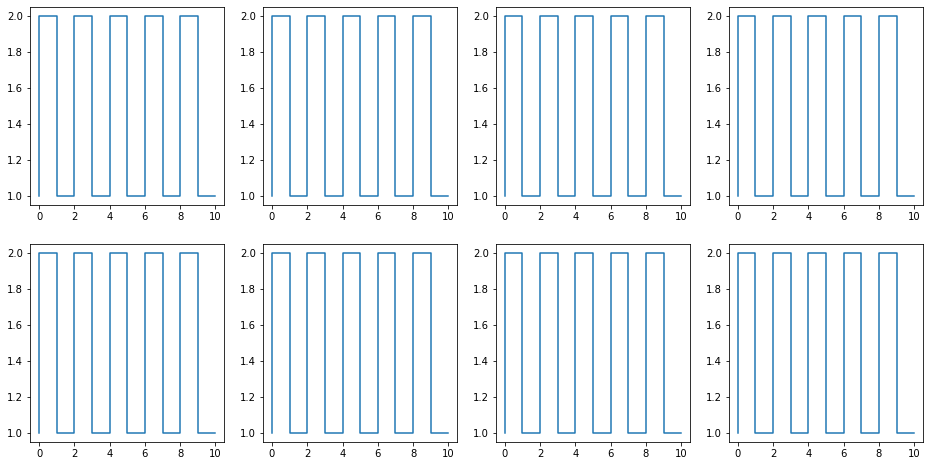

In [66]:
import matplotlib.pyplot as plt
import random
def gamble(p,n,k):
    x = 1
    trajectory = [x]
    for i in range(k):
      if x == 1:
        x = 2
        trajectory.append(x)
      else:
        x = 1
        trajectory.append(x)
    return trajectory

p = 1
n = 10
k = 10
gamble_trajectories,ax = plt.subplots(2,4,figsize=(16,8))

for i in range(8):
    x = gamble(p,n,k)
    t =range(len(x))
    a = ax[int(i/4)][i%4]
    a.step(t,x)

[[0.   0.5  0.   0.25 0.   0.25 0.  ]
 [0.   0.   1.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.   0.   0.   0.   1.   0.  ]]


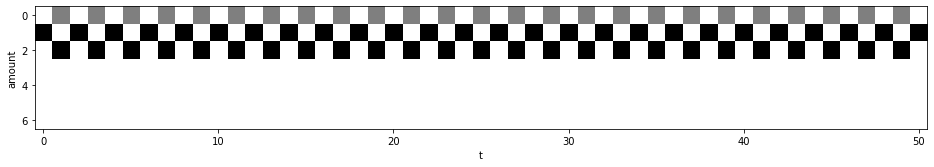

In [130]:
n = 6

P = np.zeros((n+1,n+1))
P[0,1] = 0.5
P[0,3] = 0.25
P[0,5] = 0.25
P[1,2] = 1
P[2,1] = 1
P[3,4] = 1
P[4,3] = 1
P[5,6] = 1
P[6,5] = 1
print(P)
p = np.zeros(n+1)
p[1] = 1

trajectory = [p]
for t in range(50):
    p = P.dot(p)
    trajectory.append(p)

trajectory = np.matrix(trajectory).transpose()
    
fig,ax = plt.subplots(1,1,figsize=(16,5))
ax.imshow(trajectory,cmap="gray_r")
ax.set_xlabel("t")
ax.set_ylabel("amount");